# **Lab 5: Integration**
**Dániel Szabó**

# **Abstract**

This laboratory is about approximating definite integrals of functions. Given a function $f: D\to R$ and a subset of the domain $S\subseteq D$ the task is to approximately determine the value of $\int_S f(x) dx$. For this, we will use Gauss and Monte Carlo quadrature in this lab.

#**About the code**

In [1]:
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2021 Dániel Szabó (dszabo@kth.se)

# This file is part of the course DD2365 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

In [2]:
# Load neccessary modules.
import numpy as np
import scipy.integrate as integrate
import random
from matplotlib import pyplot as plt

random.seed(0)

# **Introduction**

In the Gauss quadrature, we have $q+1$ quadrature points, and the approximation of the integral is calculated as a weighted sum of the function values at these points. This way, the result is exact for any polynomial up to degree $2q+1$. Using this fact, the quadrature points and the weights can be calculated: for any polynomial $p$ of degree at most $2q+1$ the following holds: $\int_S p(x)dx=\sum_{j=0}^q w_jp(x_j)$. It is equivalent to solving a system of equations with an arbitrary polynomial basis $\{\varphi_i\}_{i=0}^{2q+1}$ of the $2q+1$-degree polynomials: $\forall i\in\{0,1,\dots,2q+1\}\ \int_S\varphi_i(x) dx=\sum_{j=0}^qw_j\varphi_i(x_j)$.

The Monte Carlo quadrature works similarly, but the quadrature points are generated uniformly at random over the set $S$; and the weights are $|S|/n$ for each point, where $n$ is the number of generated quadrature points. Based on the law of large numbers, we know that for large $n$'s $\int_Sf(x)dx\approx\frac{|S|}{n}\sum_{i=1}^nf(x_i)$. By the central limit theorem, the rate of convergence is $\Theta(1/\sqrt{n})$.

The first task is to implement a 2-point Gauss quadrature over the unit interval. The second one is a bivariate version of Gauss quadrature: 3-point edge midpoint quadrature over a reference triangle. In the third task, a Monte Carlo quadrature over the unit interval is to be implemented. The fourth, extra assignment is a bivariate version of the third task: Monte Carlo quadrature over a reference triangle.

# **Method**

1. 2-point Gauss quadrature over a unit interval. The main problem in this assignment was not the implementation (it is just a weighted sum of some values of a given function: $\sum_{i=0}^1w_if(x_i)$), but determining the weights and the quadrature points. 

 The calculation was done in the way that was desribed in the Introduction part of this report, and similarly to Example 11.3 of the lecture notes. (For the problems task 11.3, the calculation was also done by using a coordinate map, and it gave the same results as this method.) We know that the approximation is exact for any polynomial of degree at most 3, i.e. $\int_0^1\sum_{i=0}^3c_ix^idx=w_0\sum_{i=0}^3c_ix_0^i+w_1\sum_{i=0}^3c_ix_1^i$. It can be rearranged into equation $c_0(1-w_0-w_1)+c_1(1/2-w_0x_0-w_1x_1)+c_2(1/3-w_0x_0^2-w_1x_1^2)+c_3(1/4-w_0x_0^3-w_1x_1^3)=0$, which has to hold for any values of coefficients $c_i$. It means that the four parenthesized expressions all need to be zero. Solving this system of equations, we get the following: $w_0=w_1=1/2,\ x_0=\frac{1}{2}(1-\frac{1}{\sqrt{3}}),\ x_1=\frac{1}{2}(1+\frac{1}{\sqrt{3}})$.

In [3]:
def gauss2(f):
    w0, w1 = 0.5, 0.5
    x0, x1 = 0.5*(1-1/(3**0.5)), 0.5*(1+1/(3**0.5))
    return w0*f(x0) + w1*f(x1)

2. 3-point edge midpoint quadrature over a reference triangle. We use the reference triangle with vertices $A=(0,0)$, $B=(0,1)$, $C=(1,0)$. This way, the midpoints of the edges are $x_0=(0,0.5)$, $x_1=(0.5,0)$, $x_2=(0.5,0.5)$. The weights can be calculated similarly to the previous task: we know that the approximation is exact for all quadratic bivariate functions $f(x)=c_0+c_1x[0]+c_2x[1]+c_3x[0]x[1]+c_4x[0]^2+c_5x[1]^2$. Example 11.5 gives us the result: $w_0=w_1=w_2=1/6$.

 The code just calculates the weighted sum $\sum_{i=0}^2w_if(x_i)$.

In [4]:
def midpoint3(f):
    x0, x1, x2 = [0,0.5], [0.5,0], [0.5,0.5]
    w0, w1, w2 = 1/6, 1/6, 1/6
    return w0*f(x0) + w1*f(x1) + w2*f(x2)

3. Monte Carlo quadrature over a unit interval. The method has two inputs: the function $f$ and the number $n$ of quadrature points. It generates $n$ values $\{x_i\}_{i=1}^n$ uniformly from interval $[0,1]$ and returns the average $\frac{1}{n}\sum_{i=1}^nf(x_i)$ (the size of the set we integrate over is one: $|S|=|[0,1]|=1$).

In [5]:
def mcunit(f, n):
    if n <= 0: raise Exception("The number of quadrature points should be positive.")
    sum = 0
    for i in range(n):
        xi = random.uniform(0,1)
        sum += f(xi)
    return sum/n

4. Monte Carlo quadrature over a reference triangle. Similarly to the previous task, the number of quadrature points is also part of the input. We generate $n$ points $\{x_i\}_{i=1}^n$ (where each $x_i$ is from $\mathbb{R}^2$) uniformly over the reference triangle given by vertices $A=(0,0),\ B=(0,1),\ C=(1,0)$. The result is $\frac{1}{2n}\sum_{i=1}^nf(x_i)$, because the size of $S$ (the area of the triangle) is 1/2, so the weights are $\frac{|S|}{n}=\frac{1}{2n}$.

 But how do we calculate uniformly random points over our reference triangle? It can be shown that if $r_1$ and $r_2$ are drawn from the uniform distribution over $[0,1]$, then point $((1-r_2)\sqrt{r_1},\ r_2\sqrt{r_1})$ is uniformly distributed over our reference triangle (see https://math.stackexchange.com/questions/18686/uniform-random-point-in-triangle-in-3d).

In [6]:
def mctriangle(f, n):
    if n <= 0: raise Exception("The number of quadrature points should be positive.")
    sum = 0
    for i in range(n):
        r1 = random.uniform(0,1)
        r2 = random.uniform(0,1)
        xi = [(r1**0.5)*(1-r2), r2*(r1**0.5)] # uniform over ref. triangle
        sum += f(xi)
    return sum/n/2

# **Results**

The verification of the methods is done by computing the results for a random function. For tasks 1 and 3 it is a univariate polynomial $f$ of degree 3, and for tasks 2 and 4 it is a quadratic bivariate polynomial $g$. The coefficients of the polynomials are drawn from the standard normal distribution. Method "f" returns the value of $f$ at a given point, and "g" is the same for function $g$.

In [7]:
f_coeffs = []
g_coeffs = []
for i in range(4):
    f_coeffs.append(random.gauss(0,1))
for i in range(6):
    g_coeffs.append(random.gauss(0,1))
    
def f(x):
    sum = 0
    for i in range(4):
        sum += f_coeffs[i] * x**i
    return sum
    
def g(x):
    return g_coeffs[0]*x[0]*x[0] + g_coeffs[1]*x[1]*x[1] + g_coeffs[2]*x[0]*x[1] + g_coeffs[3]*x[0] + g_coeffs[4]*x[1] + g_coeffs[5]

1. For the verification of task 1, we calculate the exact value of the integral using the scipy.integrate.quad method, and then the approximation given by our method. As the 2-point Gauss quadrature is exact for polynomials of degree at most 3, it should be the same as the exact solution (but of course some minor differences are possible beacuse computer calculations are imprecise).

In [8]:
corrf = integrate.quad(f, 0, 1)[0]
res1 = gauss2(f)
np.testing.assert_almost_equal(res1,corrf)

2. For the verification of task 2, we calculate the exact value of the integral using the scipy.integrate.dblquad method, and then the approximation given by our method. As the 3-point edge midpoint quadrature is exact for quadratic polynomials, it should be the same as the exact solution (but of course some minor differences are possible beacuse computer calculations are imprecise).

In [9]:
corrg = integrate.dblquad(lambda x,y: g([x,y]), 0, 1, lambda x: 0, lambda x: 1-x)[0]
res2 = midpoint3(g)
np.testing.assert_almost_equal(res2,corrg)

3. For the verification of task 3, we calculate the exact value of the integral using the scipy.integrate.quad method, and then the approximations given by our method for different numbers of quadrature points (from 9 to 4999). For each case, the error is calculated and collected into an array. Finally, the content of this array is plotted together with function $1/\sqrt{x}$ for $x\in [9,4999]$. It is clearly visible that the two plots are very close to each other, which verifies the fact that the convergence rate is $\Theta(1/\sqrt{x})$.

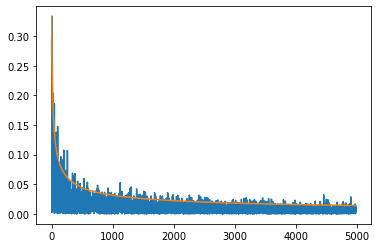

In [10]:
corrf = integrate.quad(f, 0, 1)[0]
res3 = []
for n in range(9, 5000):
    res = mcunit(f,n)
    error = np.abs(res-corrf)
    res3.append(error)
plt.figure()
plt.plot(res3)
plt.plot([1/(x**(0.5)) for x in range(9,5000)])
plt.show()

4. For the verification of task 4, we calculate the exact value of the integral using the scipy.integrate.dblquad method, and then the approximations given by our method for different numbers of quadrature points (from 9 to 4999). For each case, the error is calculated and collected into an array. Finally, the content of this array is plotted together with function $1/(2\sqrt{x})$ for $x\in [9,4999]$. It is clearly visible that the two plots are very close to each other, which verifies the fact that the convergence rate is $\Theta(1/\sqrt{x})$.

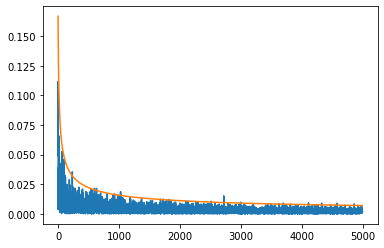

In [11]:
corrg = integrate.dblquad(lambda x,y: g([x,y]), 0, 1, lambda x: 0, lambda x: 1-x)[0]
res4 = []
for n in range(9, 5000):
    res = mctriangle(g,n)
    error = np.abs(res-corrg)
    res4.append(error)
plt.figure()
plt.plot(res4)
plt.plot([1/(x**(0.5)*2) for x in range(9,5000)])
plt.show()

# **Discussion**

The methods, implemented for solving the tasks, actually succeeded in solving them, as it is confirmed by the test results.

In the testing of tasks 3 and 4, the range (9, 5000) was chosen for the following reasons: computations for too many points take a lot of time; for very small values of $n$, the results are not that important, as they are good approximations only for large $n$'s; and including small values of $n$ would also make the differences close to the right hand side of the plot less visible.